In [7]:
from src.mgoptimization.hybrids import *
from src.mgoptimization.pso import *
import os

In [2]:
long = 8
lat = 10

In [3]:
pv_data_folder = 'FOLDER_TO_SAVE_PV_DATA_IN'

In [4]:
token = 'RENEWABLE NINJA TOKEN'

In [5]:
get_pv_data(lat, long, token, pv_data_folder)

In [8]:
hourly_ghi, hourly_temp = read_environmental_data(os.path.join(pv_data_folder, 'pv_data_lat_{}_long_{}.csv'.format(lat, long)))

In [9]:
demand = 10000
tier = 5
diesel_price = 0.4

In [10]:
load_curve = calc_load_curve(tier, demand)

In [40]:
result = optimizer(diesel_price=diesel_price,
                   hourly_ghi=hourly_ghi,
                   hourly_temp=hourly_temp,
                   load_curve=load_curve,
                   discount_rate=0.08,
                   diesel_cost=261,  # diesel generator capital cost, USD/kW rated power
                   battery_cost=314,  # battery capital capital cost, USD/kWh of storage capacity
                   inverter_cost=66,  # USD/kW
                   pv_cost=660,  # PV panel capital cost, USD/kW peak power
                   diesel_limit=0.1, # Maximum share of generation over a year coming from diesel generator
                   charge_controller=142,
                   lpsp_max=0.02,  # maximum loss of load allowed over the year
                   iterations=100,
                   n_particles=50,
                   ftol=0.0001,
                   ftol_iter=10,
                   verbose=True)

print('Generation LCOE is found to be {} USD/kWh'.format(round(result['gen_lcoe'], 2)))
print('Optimum PV capacity is found to be {} kW'.format(round(result['pv_capacity'], 1)))
print('Optimum diesel capacity is found to be {} kW'.format(round(result['diesel_gen_capacity'], 1)))
print('Optimum battery capacity is found to be {} kWh'.format(round(result['battery_capacity'], 1)))

2023-10-24 10:36:22,823 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best:  14%|████████▌                                                    |14/100, best_cost=0.164
2023-10-24 10:36:23,421 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.164320621133967, best pos: [ 5.02895692 13.80821456  0.68286596]


Generation LCOE is found to be 0.16 USD/kWh
Optimum PV capacity is found to be 5.0 kW
Optimum diesel capacity is found to be 0.7 kW
Optimum battery capacity is found to be 13.8 kWh


In [16]:
import matplotlib.pyplot as plt
import numpy as np

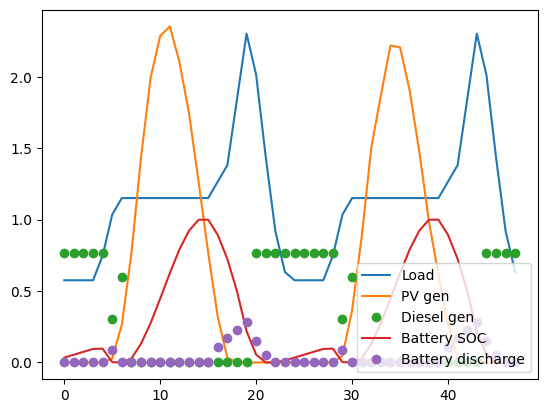

In [13]:
load = np.array(load_curve[2400:2448])
pv_gen = np.array(result['hourly_pv_gen'][2400:2448])
diesel_gen = np.array(result['hourly_diesel_gen'][2400:2448])
battery_soc = np.array(result['battery_hourly_soc'][2400:2448])
battery_usage = np.array(result['hourly_battery_usage'][2400:2448])

plt.plot(load, label='Load')
plt.plot(pv_gen, label='PV gen')
plt.plot(diesel_gen, 'o', label='Diesel gen')
plt.plot(battery_soc, label='Battery SOC')
plt.plot(battery_usage, 'o', label='Battery discharge')
plt.legend(loc='lower right')